# nema3 PDE=0.3, sigmaT = 85 ps, window sipms all events

- Phantom : nema 3
- Events: all
- Detector geometry: SiPMs in LXe, with window sipms
- Time resolution: 85 ps
- PDE = 0.3

In [1]:
import Pkg

In [3]:
Pkg.add.(["HTTP", "Plots", "DataFrames", "HDF5","DrWatson", "StatsBase", "PhysicalConstants"]);

In [6]:
Pkg.add.(["LsqFit","GLM"])

2-element Vector{Nothing}:
 nothing
 nothing

In [7]:
Pkg.add("Distributions") 

In [1]:
#using Distributions

In [2]:
#using LsqFit
#using GLM
#using HTTP
#using Test

In [1]:
using Plots
using DataFrames
using HDF5
using DrWatson
using PhysicalConstants
using PhysicalConstants.CODATA2018
using Unitful

In [2]:
using Glob
using CSV

In [3]:
using Statistics
using StatsBase
using Printf

In [4]:
using Logging

In [5]:
@quickactivate "JPetalo"

In [6]:
pwd()

"/Users/jj/JuliaProjects/JPetalo/notebooks"

In [7]:
datadir()

"/Users/jj/JuliaProjects/JPetalo/data"

In [8]:
srcdir()

"/Users/jj/JuliaProjects/JPetalo/src"

In [245]:
include(srcdir("JPetalo.jl"))

Main.JPetalo

In [10]:
import Unitful:
    nm, μm, mm, cm, m, km, inch, ft, mi,
    ac,
    mg, g, kg,
    Ra, °F, °C, K,
    rad, °,
    ns, μs, ms, ps, s, minute, hr, d, yr, Hz,
    eV,
    μJ, mJ, J,
	mW, μW, W,
    A, N, mol, mmol, V, L, mL, μL, M

In [11]:
function loglevel(log)
    if log == "Debug"
        logger = SimpleLogger(stdout, Logging.Debug)
    elseif log =="Info"
        logger = SimpleLogger(stdout, Logging.Info)
    else
        logger = SimpleLogger(stdout, Logging.Warn)
    end
    old_logger = global_logger(logger)
end

loglevel (generic function with 1 method)

In [12]:
function plotreso(r1t, r1x, tx1, ty1, xs, xmin, xmax, nbins=150)
    h1,p1 = JPetalo.hist2d(r1x, r1t, nbins, tx1, ty1)
    h2,p2 = JPetalo.hist1d(r1t - r1x, xs, nbins, xmin, xmax)
    plot(p1, p2,  layout= (1, 2), legend=false, fmt = :png,  size = (1000, 400),
        left_margin=5Plots.mm, right_margin=1Plots.mm, bottom_margin=5Plots.mm)
end

plotreso (generic function with 2 methods)

In [13]:
loglevel("Warn")

Base.CoreLogging.SimpleLogger(IJulia.IJuliaStdio{Base.PipeEndpoint}(IOContext(Base.PipeEndpoint(RawFD(44) open, 0 bytes waiting))), Info, Dict{Any, Int64}())

In [291]:
function writemdf(dir, file, df)
    path = string(dir,"/", file)
    CSV.write(path, df)
end

writemdf (generic function with 1 method)

## Read data file with nema3 events, all interactions with 2 gammas in detector

In [294]:
ndf = JPetalo.readdf("n3df-all-w-p2") 
println("n3df no windows: length =", nrow(ndf))

n3df no windows: length =278261


In [295]:
println(names(ndf))

["nsipm1", "nsipm2", "phistd1", "phistd2", "q1", "q2", "r1", "r2", "t1", "t2", "ta1", "ta2", "tr1", "tr2", "ux", "uy", "uz", "x1", "x2", "xb1", "xb2", "xr1", "xr2", "xs", "xt1", "xt2", "y1", "y2", "yb1", "yb2", "yr1", "yr2", "ys", "yt1", "yt2", "z1", "z2", "zb1", "zb2", "zr1", "zr2", "zs", "zstd1", "zstd2", "zt1", "zt2"]


## q1 vs q2

In [296]:
function q1vsq2(df)
    h1,p1 = JPetalo.hist2d(df.q1, df.q2, 150, "q1 (pes)","q2 (pes)", 100., 3500.,100., 3500.)
    h2,p2       = JPetalo.hist1d(df.q1, "q1", 100, 100.0, 3500.);
    plot(p1, p2, layout= (1, 2), legend=false, fmt = :png, size = (1000, 400),
        left_margin=5Plots.mm, right_margin=1Plots.mm, bottom_margin=5Plots.mm)
end
    

q1vsq2 (generic function with 1 method)

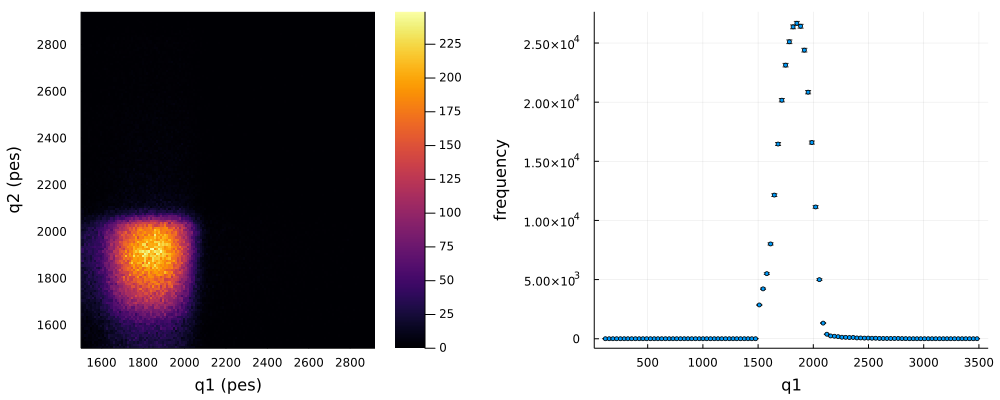

In [297]:
q1vsq2(ndf)

## Cut in (q1,q2) 

In [440]:
ndfq =JPetalo.selectinterval(ndf, "q1", "q2", 1600.0, 2100.0);
println("after q1q2 cut: ndfq has a length of ", nrow(ndfq))

after q1q2 cut: ndfq has a length of 244120


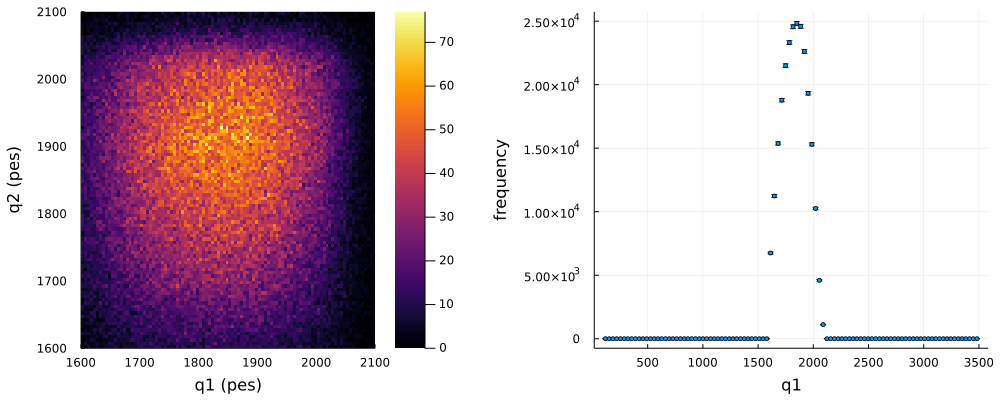

In [441]:
q1vsq2(ndfq)

## r vs q

In [442]:
function r1q1(df)
    h1,p1 = JPetalo.hist2d(df.q1, df.r1, 150, "q1 (pes) ","r1 (mm)",1500., 3000.0,350., 450.)
    h2,p2 = JPetalo.hist1d(df.q1, "q1", 100, 1500., 3000.0)
    plot(p1, p2, layout= (1, 2), legend=false, fmt = :png, size = (1000, 400),
        left_margin=5Plots.mm, right_margin=1Plots.mm, bottom_margin=5Plots.mm)
end


r1q1 (generic function with 1 method)

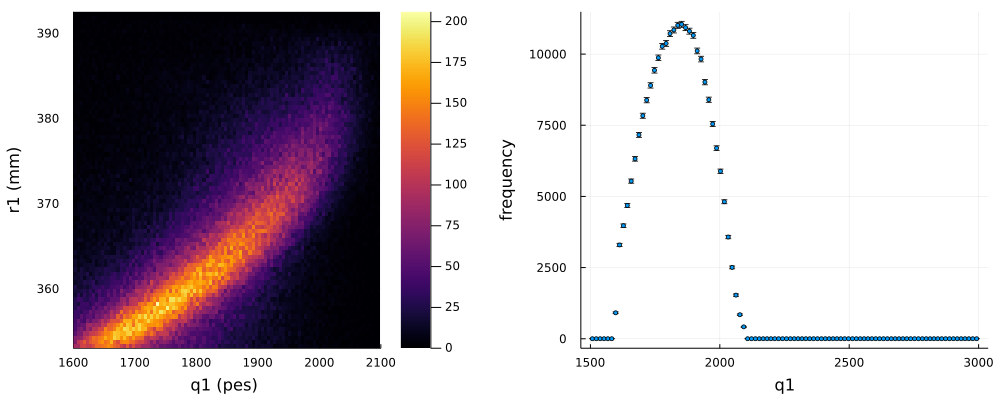

In [443]:
r1q1(ndfq)

In [444]:
function nfit_profile(df,cx,cy,tx,ty,pol)
    cq, fq, pq = JPetalo.fit_profile(df, cx,cy,tx,ty,pol)
    println("for ",cx,"=f(",cy,"): fit parameters =",cq )
    return cq, fq, pq
end

nfit_profile (generic function with 1 method)

In [445]:
function nplot_profile(p)
    plot(p,  layout= (1, 1), legend=false, fmt = :png,  
        left_margin=5Plots.mm, right_margin=1Plots.mm, bottom_margin=5Plots.mm)
end
    

nplot_profile (generic function with 1 method)

In [446]:
cq, fq, pq = nfit_profile(ndfq, "q1","r1","q1 (pes) ","r1 (mm)", "pol1")

for q1=f(r1): fit parameters =[273.0802174680788, 0.05095465661740595]


([273.0802174680788, 0.05095465661740595], Main.JPetalo.var"#f1#48"{Vector{Float64}}([273.0802174680788, 0.05095465661740595]), Plot{Plots.GRBackend() n=2})

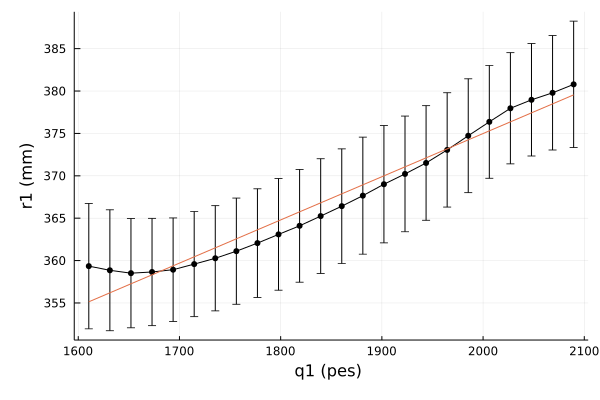

In [447]:
nplot_profile(pq)

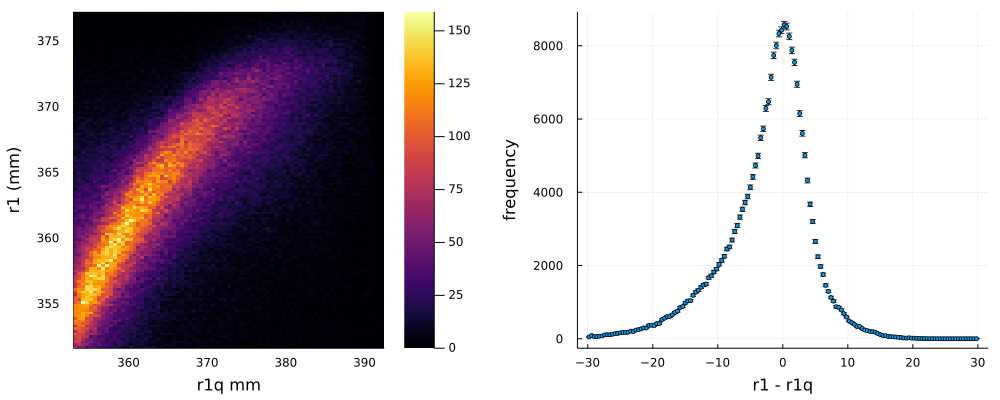

In [448]:
r1q = fq.(ndfq.q1) - 3.0 * ones(length(ndfq.q2))
plotreso( r1q, ndfq.r1, "r1q mm", "r1 (mm)", "r1 - r1q", -30., 30.)

 σ =     4.2 mm

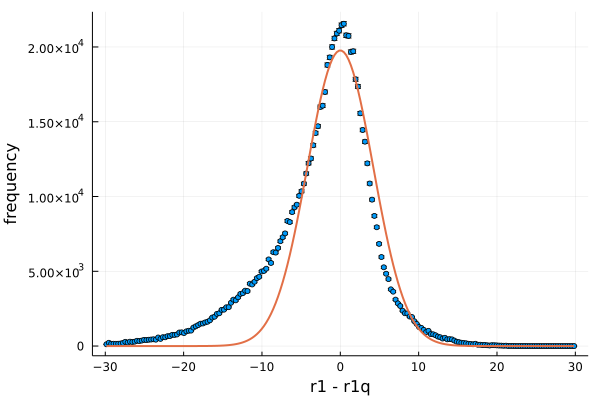

In [449]:
fg,p = JPetalo.fitg1(r1q - ndfq.r1, "r1 - r1q", 200, -30.0, 30.0, xgmin=-10.0, xgmax=10.0)
@printf " σ = %7.1f mm" fg.std[1] 
plot(p)

In [450]:
cq2, fq2, p2q = nfit_profile(ndfq, "q2","r2","q2 (pes) ","r2 (mm)", "pol1")

for q2=f(r2): fit parameters =[277.5521271979226, 0.04977389934421198]


([277.5521271979226, 0.04977389934421198], Main.JPetalo.var"#f1#48"{Vector{Float64}}([277.5521271979226, 0.04977389934421198]), Plot{Plots.GRBackend() n=2})

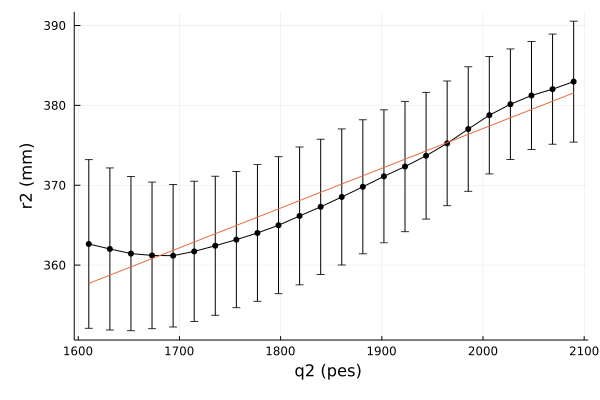

In [451]:
nplot_profile(p2q)

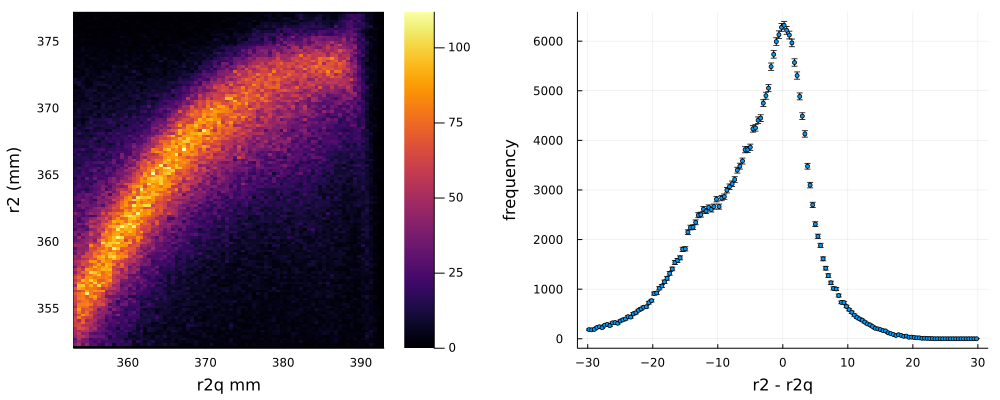

In [452]:
r2q = fq2.(ndfq.q2) - 5.0 * ones(length(ndfq.q2)) ;
plotreso( r2q, ndfq.r2, "r2q mm", "r2 (mm)", "r2 - r2q", -30., 30.)

 σ =     5.3 mm

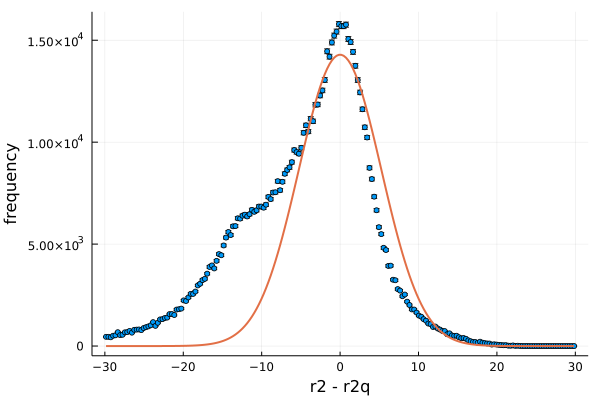

In [453]:
fg,p = JPetalo.fitg1(r2q - ndfq.r2, "r2 - r2q", 200, -30.0, 30.0, xgmin=-10.0, xgmax=10.0)
@printf " σ = %7.1f mm" fg.std[1] 
plot(p)

## ZSTD

In [454]:
function zstd(df)
    h1,p1 = JPetalo.hist2d(df.zstd1, df.r1, 150, "zstd1 (mm) ","r1 (mm)",0.0, 40.0,350., 450.)
    h2,p2 = JPetalo.hist1d(df.zstd1, "zstd1", 100, 0.,35.)
    plot(p1, p2, layout= (1, 2), legend=false, fmt = :png, size = (1000, 400),
        left_margin=5Plots.mm, right_margin=1Plots.mm, bottom_margin=5Plots.mm)
end

zstd (generic function with 1 method)

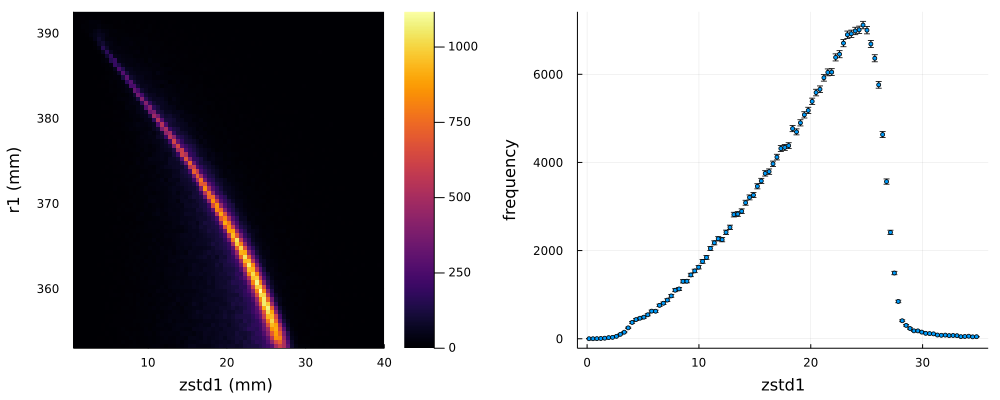

In [455]:
zstd(ndfq)

In [456]:
ndfz =JPetalo.selectinterval(ndfq, "zstd1", "zstd2", 5.0, 25.0);

for zstd1=f(r1): fit parameters =[392.5251263335374, -2.0916192492554964, 0.07443934409654257, -0.0018349820276836834]


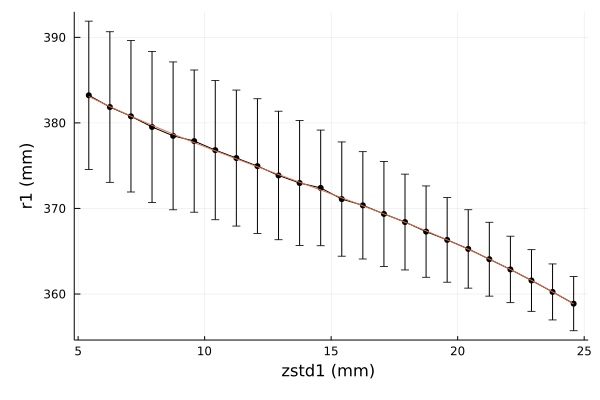

In [457]:
cz, fz, pz = nfit_profile(ndfz, "zstd1","r1","zstd1 (mm) ","r1 (mm)", "pol3")
nplot_profile(pz)

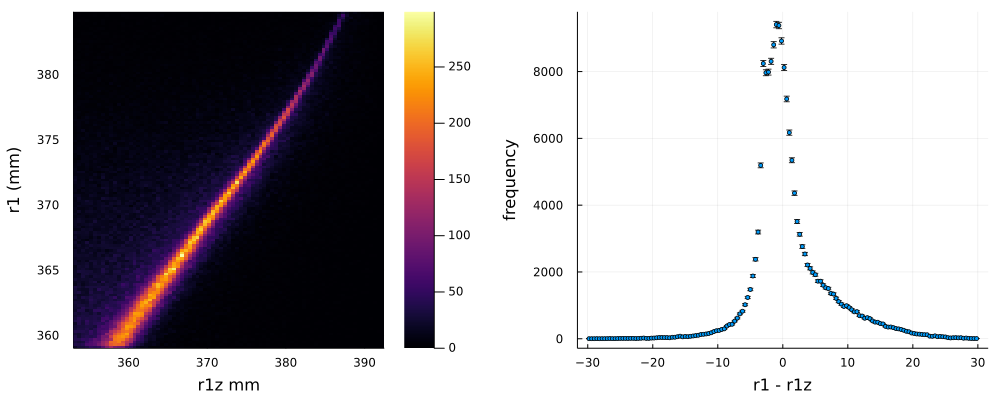

In [458]:
r1z = fz.(ndfz.zstd1) + 1.0 * ones(length(ndfz.q1)) ;
plotreso(r1z, ndfz.r1, "r1z mm", "r1 (mm)", "r1 - r1z", -30., 30.)

 σ =     2.9 mm

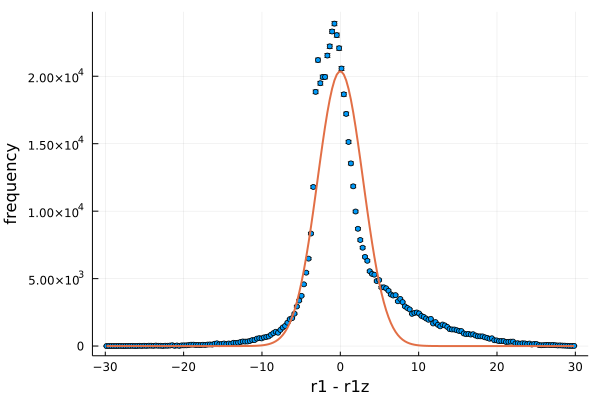

In [459]:
fg,p = JPetalo.fitg1(r1z - ndfz.r1, "r1 - r1z", 200, -30.0, 30.0, xgmin=-10.0, xgmax=10.0)
@printf " σ = %7.1f mm" fg.std[1] 
plot(p)

for zstd2=f(r2): fit parameters =[393.73453619252876, -2.2384923063039834, 0.08026595827964644, -0.0018958281667776856]


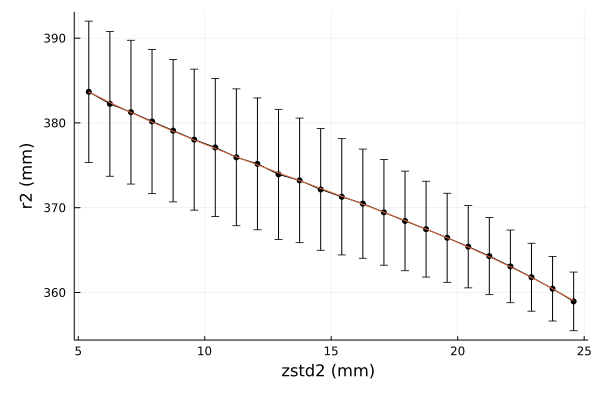

In [460]:
cz2, fz2, pz2 = nfit_profile(ndfz, "zstd2","r2","zstd2 (mm) ","r2 (mm)", "pol3")
nplot_profile(pz2)

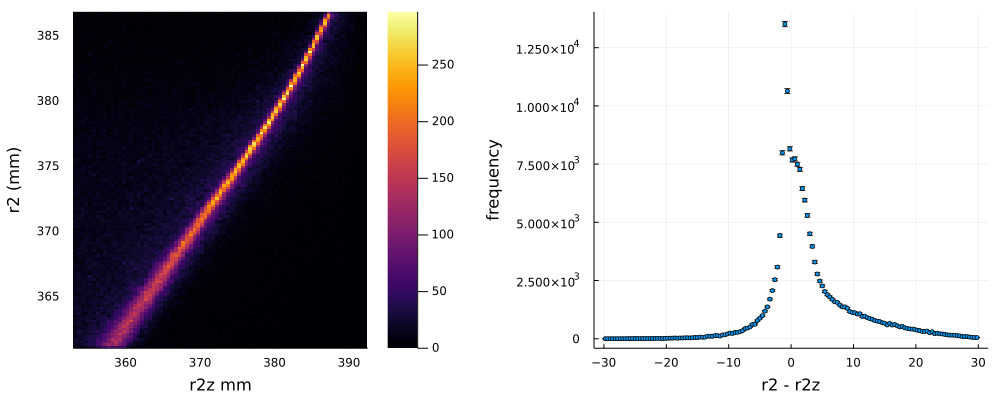

In [461]:
r2z = fz.(ndfz.zstd2) + 3.0 * ones(length(ndfz.q1)) ;
plotreso(r2z, ndfz.r2, "r2z mm", "r2 (mm)", "r2 - r2z", -30., 30.)

 σ =     2.3 mm

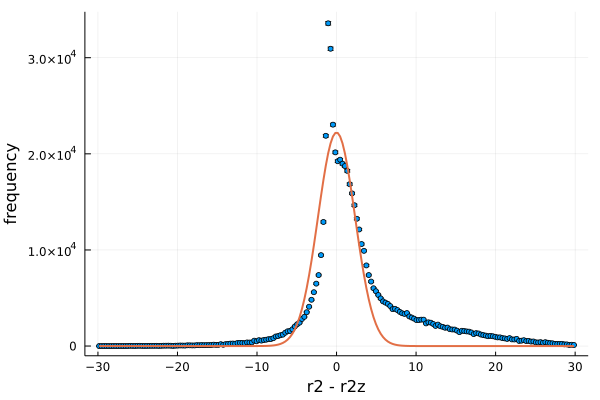

In [462]:
fg,p = JPetalo.fitg1(r2z - ndfz.r2, "r2 - r2z", 200, -30.0, 30.0, xgmin=-10.0, xgmax=10.0)
@printf " σ = %7.1f mm" fg.std[1] 
plot(p)

## PhiSTD

In [463]:
function phistd(df)
    h1,p1 = JPetalo.hist2d(df.phistd1, df.r1, 150, "σϕ (mm) ","r1 (mm)",0.0, 0.1,350., 450.)
    h2,p2 = JPetalo.hist1d(df.phistd1, "σϕ (mm)", 100, 0.,0.1)
    plot(p1, p2, layout= (1, 2), legend=false, fmt = :png, size = (1000, 400),
        left_margin=5Plots.mm, right_margin=1Plots.mm, bottom_margin=5Plots.mm)
end

phistd (generic function with 1 method)

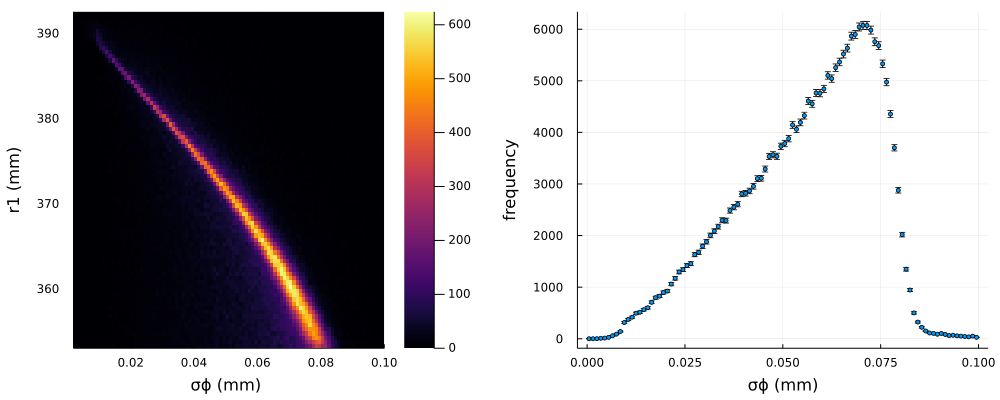

In [464]:
phistd(ndfq)

In [465]:
ndfp =JPetalo.selectinterval(ndfq, "phistd1", "phistd2", 0.025, 0.070);

for phistd1=f(r1): fit parameters =[393.1750555844874, -803.2786346420899, 10549.01804609245, -83220.63139377083]


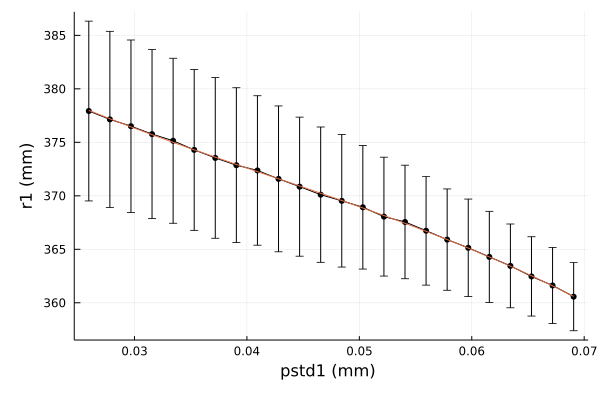

In [466]:
cp, fp, pp = nfit_profile(ndfp, "phistd1","r1","pstd1 (mm) ","r1 (mm)", "pol3")
nplot_profile(pp)

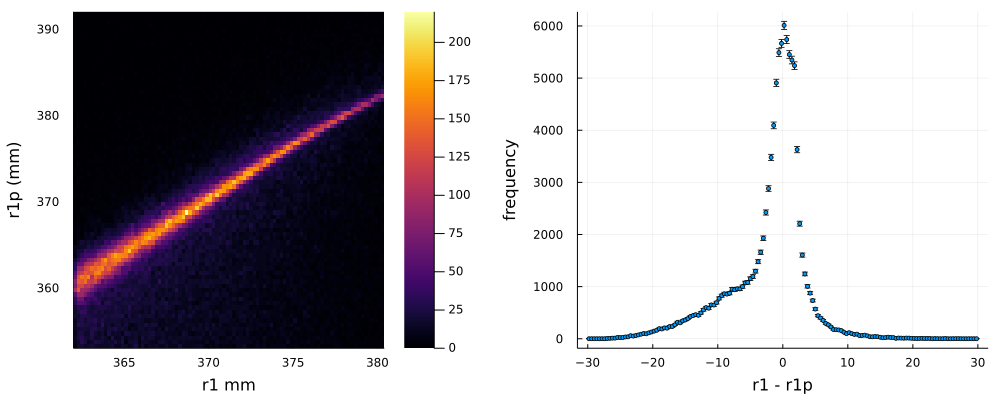

In [467]:
r1p = fp.(ndfp.phistd1) + 2.0 * ones(length(ndfp.q1))
plotreso(ndfp.r1, r1p, "r1 mm", "r1p (mm)", "r1 - r1p", -30., 30.)

 σ =     2.1 mm

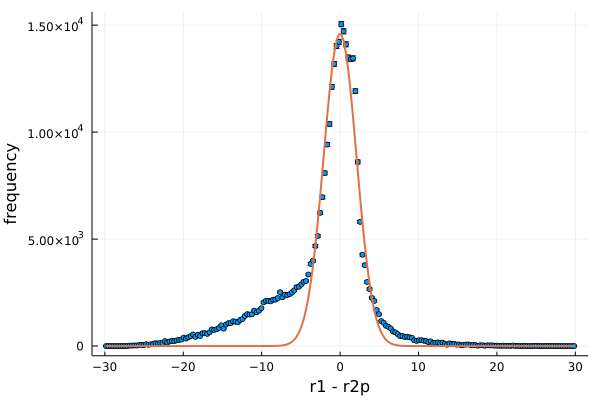

In [468]:
fg,pg = JPetalo.fitg1(ndfp.r1 - r1p, "r1 - r2p", 200, -30.0, 30.0, xgmin=-5.0, xgmax=5.0)
@printf " σ = %7.1f mm" fg.std[1] 
plot(pg)

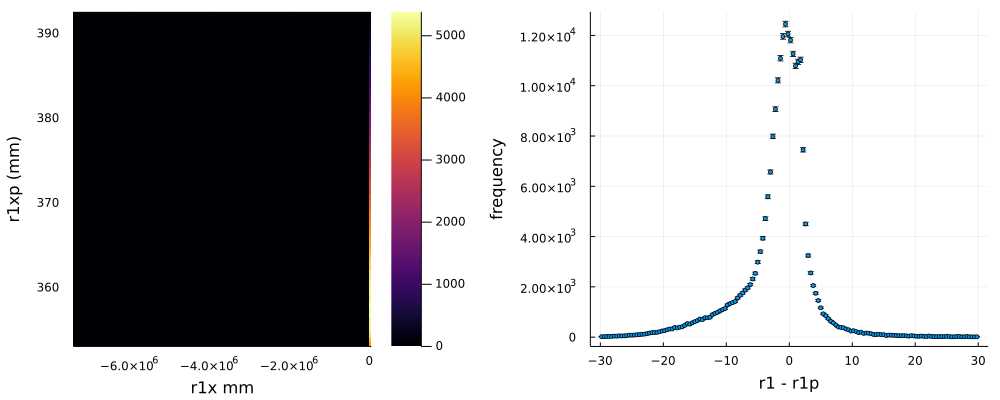

In [469]:
rx1p = fp.(ndfq.phistd1) + 2.0 * ones(length(ndfq.q1))
plotreso(ndfq.r1, rx1p, "r1x mm", "r1xp (mm)", "r1 - r1p", -30., 30.)

 σ =     2.4 mm

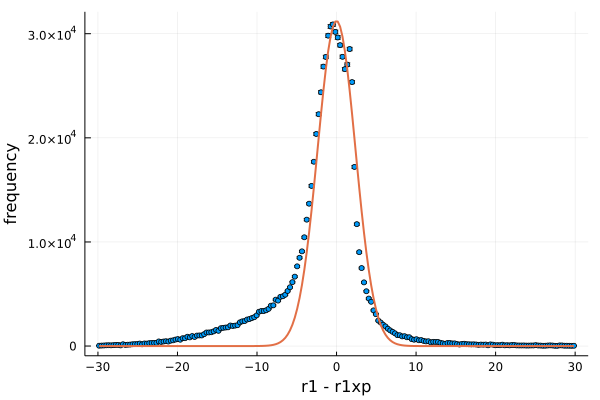

In [470]:
fg,pg = JPetalo.fitg1(ndfq.r1 - rx1p, "r1 - r1xp", 200, -30.0, 30.0, xgmin=-5.0, xgmax=5.0)
@printf " σ = %7.1f mm" fg.std[1] 
plot(pg)

for phistd2=f(r2): fit parameters =[392.8515241610774, -771.6196536906052, 9844.725480282203, -78240.51801998865]


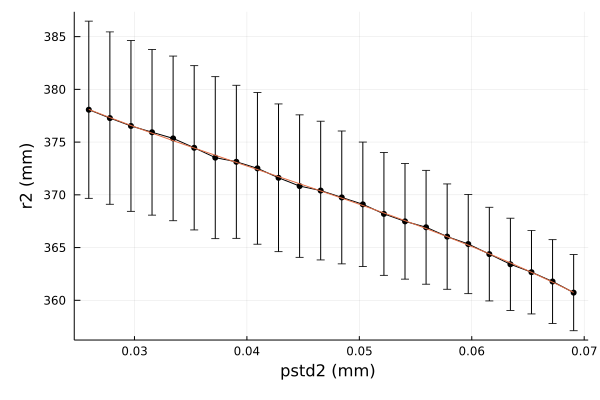

In [471]:
cp2, fp2, pp2 = nfit_profile(ndfp, "phistd2","r2","pstd2 (mm) ","r2 (mm)", "pol3")
nplot_profile(pp2)

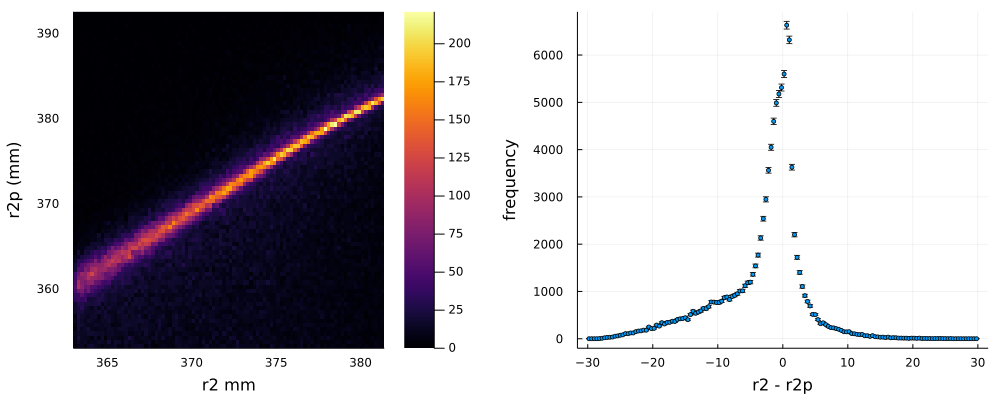

In [472]:
r2p = fp.(ndfp.phistd2) + 3.0 * ones(length(ndfp.q2))
plotreso(ndfp.r2, r2p, "r2 mm", "r2p (mm)", "r2 - r2p", -30., 30.)

 σ =     2.0 mm

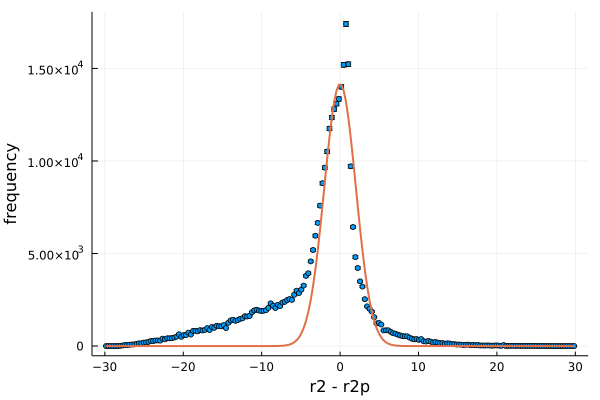

In [473]:
fg,pg = JPetalo.fitg1(ndfp.r2 - r2p, "r2 - r2p", 200, -30.0, 30.0, xgmin=-5.0, xgmax=5.0)
@printf " σ = %7.1f mm" fg.std[1] 
plot(pg)

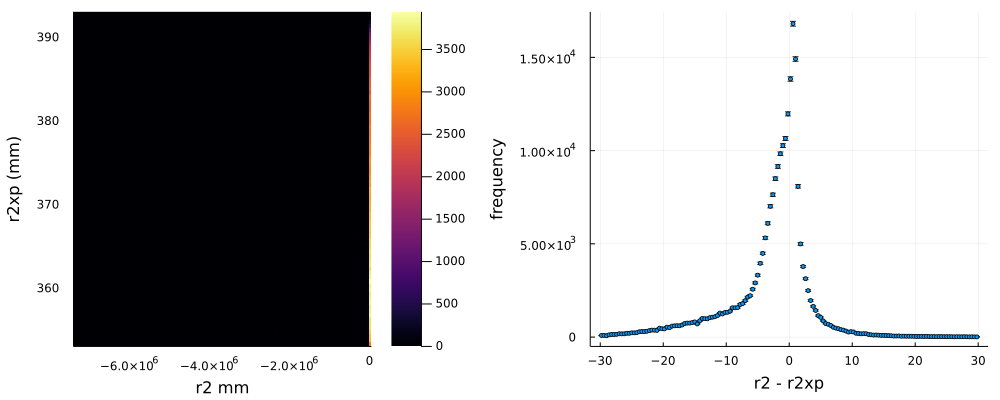

In [474]:
rx2p = fp.(ndfq.phistd2) + 3.0 * ones(nrow(ndfq))
plotreso(ndfq.r2, rx2p, "r2 mm", "r2xp (mm)", "r2 - r2xp", -30., 30.)

 σ =     2.1 mm

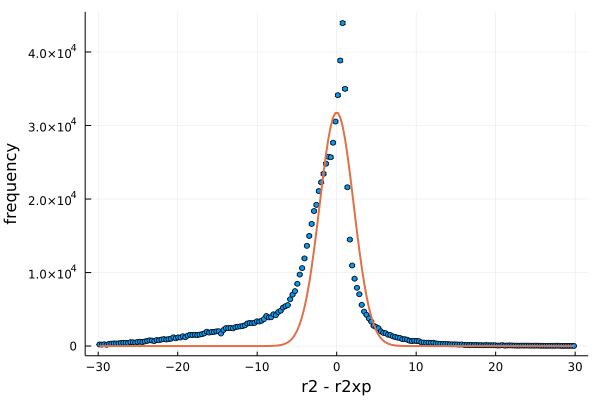

In [475]:
fg,pg = JPetalo.fitg1(ndfq.r2 - rx2p, "r2 - r2xp", 200, -30.0, 30.0, xgmin=-5.0, xgmax=5.0)
@printf " σ = %7.1f mm" fg.std[1] 
plot(pg)

In [476]:
nrow(ndfq)

244120

In [477]:
length(rx2p)

244120

## Outlook: Estimators ALL
- Best estimator (best resolution, minimum bias) is phistd
- Resolution worsens

## Resolution in (x,y,z,r) intrinsic

In [478]:
function ires(df; lim = 10.0)
    hx, px = JPetalo.hist1d(df.xt1 - df.x1, "xt - xr", 50,  -lim, lim)
    hz, pz = JPetalo.hist1d(df.zt1 - df.z1, "zt - zr", 50,  -lim, lim)
    plot(px,pz, layout= (1, 2), size = (800, 400), legend=false, fmt = :png,
        left_margin=5Plots.mm, right_margin=1Plots.mm, bottom_margin=5Plots.mm)
end

ires (generic function with 1 method)

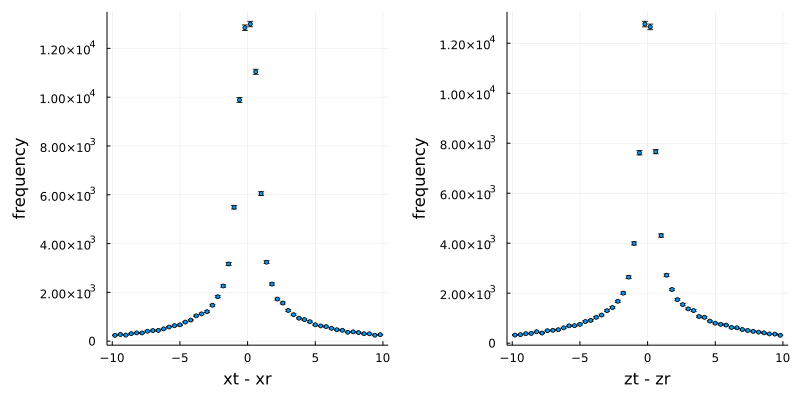

In [479]:
ires(ndfp, lim = 10.0)

zt-zr σ1 =   4.093 σ2 =   0.528

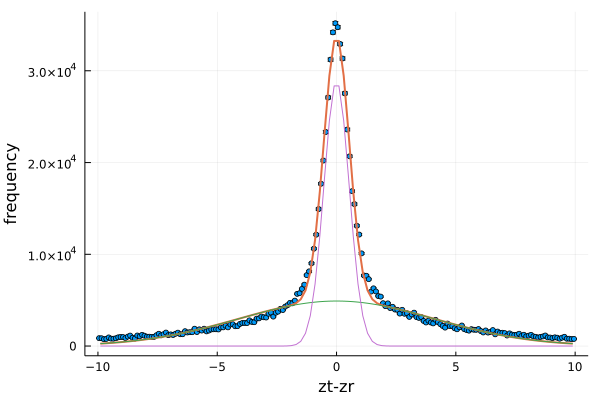

In [480]:
fg, p = JPetalo.fitg2(ndfp.zt1 - ndfp.z1, "zt-zr", 200, -10.0, 10.0, 
                      xg1min=-10.0, xg1max=-2.5, 
                      xg2min=-2.5,  xg2max =2.5, 
                      xgmin =-10.0, xgmax  =10.0)
@printf "zt-zr σ1 = %7.3f σ2 = %7.3f" fg.std[1] fg.std[2]
plot(p)

 σ =     0.7 mm

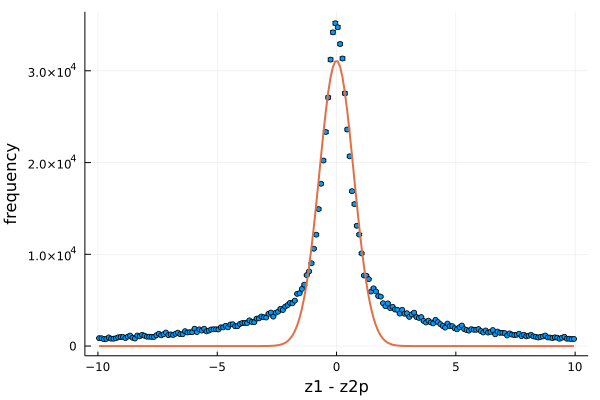

In [481]:
fg,pg = JPetalo.fitg1(ndfp.zt1 - ndfp.z1, "z1 - z2p", 200, -10.0, 10.0, xgmin=-3.0, xgmax=3.0)
@printf " σ = %7.1f mm" fg.std[1] 
plot(pg)

## Position from best estimator (r1p)

In [482]:
xp1,yp1,zp1 = JPetalo.radial_correction(ndfp.xr1, ndfp.yr1, ndfp.zr1, r1p);
xp2,yp2,zp2 = JPetalo.radial_correction(ndfp.xr2, ndfp.yr2, ndfp.zr2, r2p);

In [483]:
xxp1,xyp1,xzp1 = JPetalo.radial_correction(ndfq.xr1, ndfq.yr1, ndfq.zr1, rx1p);
xxp2,xyp2,xzp2 = JPetalo.radial_correction(ndfq.xr2, ndfq.yr2, ndfq.zr2, rx2p);

 σ =     3.8 mm

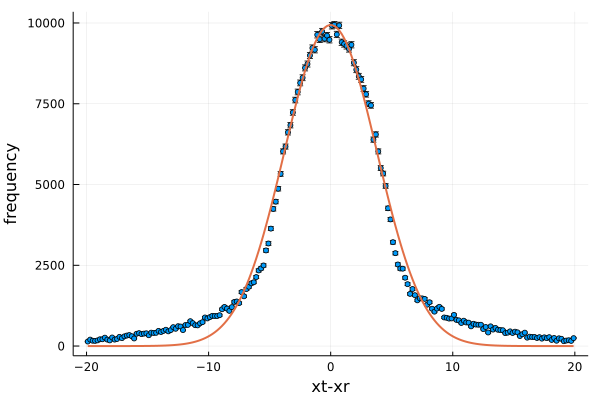

In [484]:
fg,pg = JPetalo.fitg1(ndfp.xt1 - xp1, "xt-xr", 200, -20.0, 20.0, xgmin=-5.0, xgmax=5.0)
@printf " σ = %7.1f mm" fg.std[1] 
plot(pg)

 σ =     3.2 mm

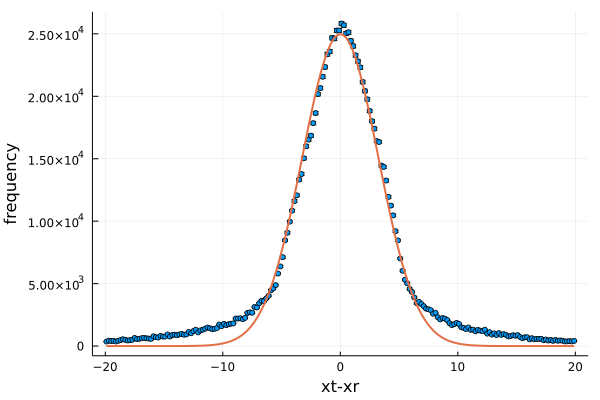

In [485]:
fg,pg = JPetalo.fitg1(ndfq.xt1 - xxp1, "xt-xr", 200, -20.0, 20.0, xgmin=-5.0, xgmax=5.0)
@printf " σ = %7.1f mm" fg.std[1] 
plot(pg)

 σ =     5.2 mm

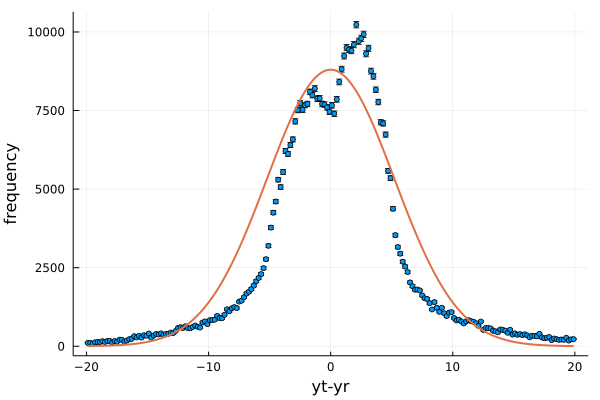

In [486]:
fg,pg = JPetalo.fitg1(ndfp.yt1 - yp1, "yt-yr", 200, -20.0, 20.0, xgmin=-5.0, xgmax=5.0)
@printf " σ = %7.1f mm" fg.std[1] 
plot(pg)

 σ =     3.8 mm

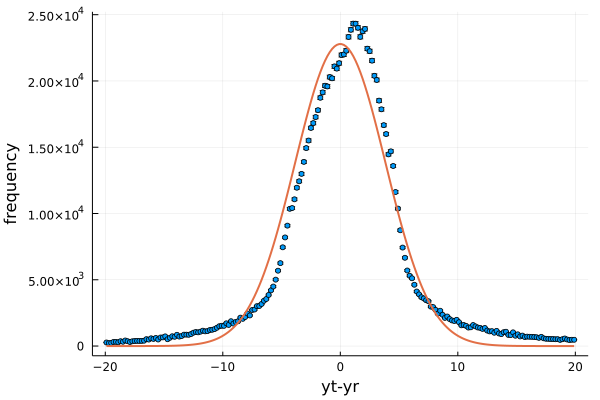

In [487]:
fg,pg = JPetalo.fitg1(ndfq.yt1 - xyp1, "yt-yr", 200, -20.0, 20.0, xgmin=-5.0, xgmax=5.0)
@printf " σ = %7.1f mm" fg.std[1] 
plot(pg)

 σ =     0.7 mm

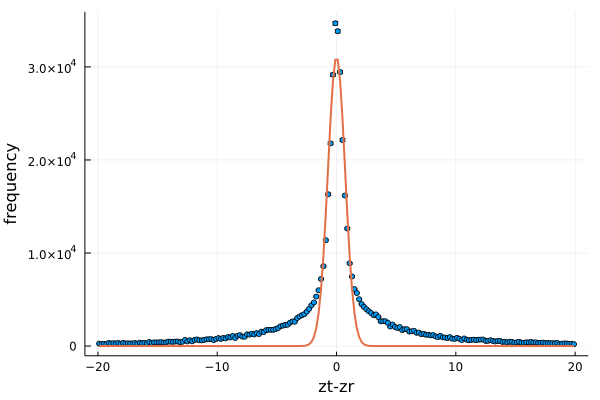

In [488]:
fg,pg = JPetalo.fitg1(ndfp.zt1 - zp1, "zt-zr", 200, -20.0, 20.0, xgmin=-5.0, xgmax=5.0)
@printf " σ = %7.1f mm" fg.std[1] 
plot(pg)

 σ =     3.0 mm

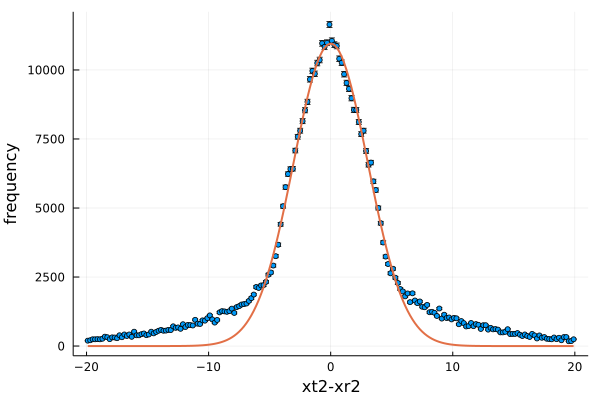

In [489]:
fg,pg = JPetalo.fitg1(ndfp.xt2 - xp2, "xt2-xr2", 200, -20.0, 20.0, xgmin=-5.0, xgmax=5.0)
@printf " σ = %7.1f mm" fg.std[1] 
plot(pg)

 σ =     2.9 mm

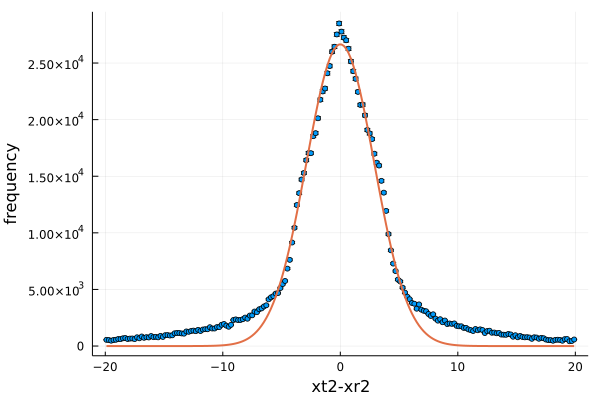

In [490]:
fg,pg = JPetalo.fitg1(ndfq.xt2 - xxp2, "xt2-xr2", 200, -20.0, 20.0, xgmin=-5.0, xgmax=5.0)
@printf " σ = %7.1f mm" fg.std[1] 
plot(pg)

 σ =     3.7 mm

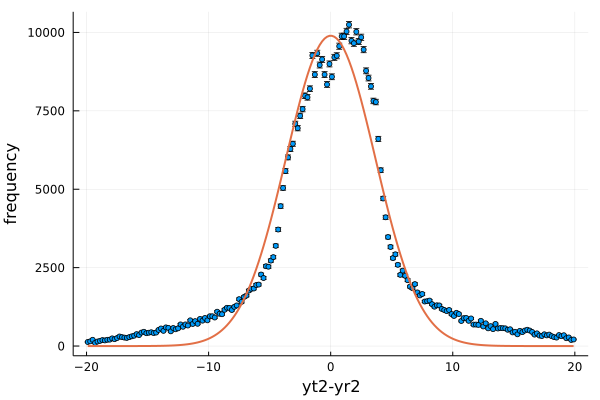

In [491]:
fg,pg = JPetalo.fitg1(ndfp.yt2 - yp2, "yt2-yr2", 200, -20.0, 20.0, xgmin=-5.0, xgmax=5.0)
@printf " σ = %7.1f mm" fg.std[1] 
plot(pg)

 σ =     3.2 mm

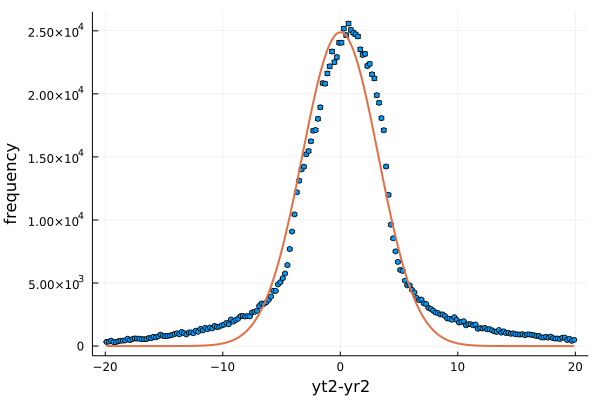

In [492]:
fg,pg = JPetalo.fitg1(ndfq.yt2 - xyp2, "yt2-yr2", 200, -20.0, 20.0, xgmin=-5.0, xgmax=5.0)
@printf " σ = %7.1f mm" fg.std[1] 
plot(pg)

 σ =     0.7 mm

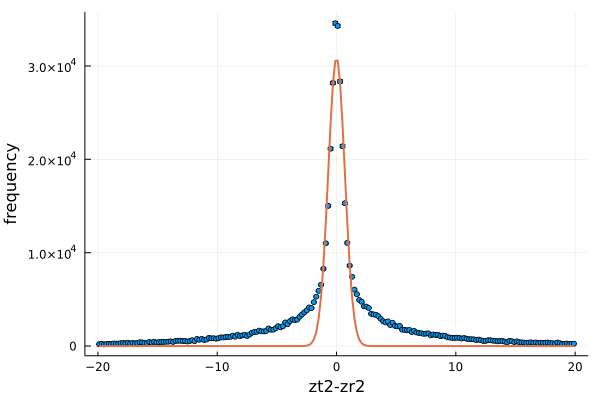

In [493]:
fg,pg = JPetalo.fitg1(ndfp.zt2 - zp2, "zt2-zr2", 200, -20.0, 20.0, xgmin=-5.0, xgmax=5.0)
@printf " σ = %7.1f mm" fg.std[1] 
plot(pg)

## Summary: resolution in (X,Y,Z):
- Resolution in Z is very good, not affected by radial corrections.
- Resolution in (X,Y) depends on r estimator resolution, and is much worse for all events.

## TOF

In [494]:
dfu = JPetalo.setunits(ndfq, "v2");

In [495]:
dt12 = JPetalo.deltatime(dfu, JPetalo.dtfirst);

In [496]:
t12 = dt12./ps;

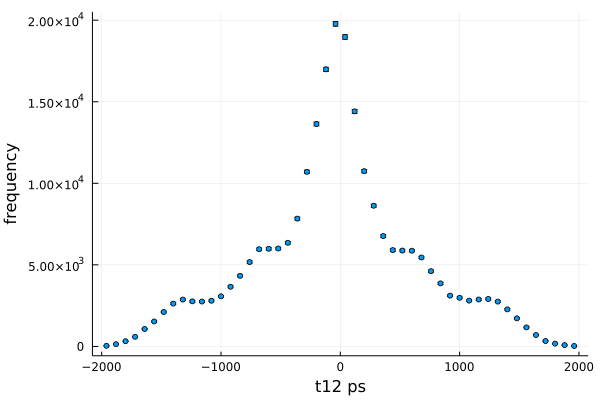

In [497]:
h,p       = JPetalo.hist1d(t12, "t12 ps", 50,  -2000., 2000.)
plot(p)

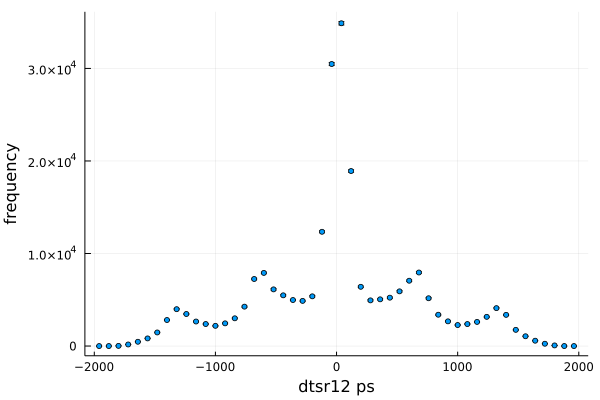

In [498]:
dtsr12 = JPetalo.ctsr(dfu, JPetalo.postrue)
tsr12 = dtsr12./ps
h,p       = JPetalo.hist1d(tsr12, "dtsr12 ps", 50,  -2000., 2000.)
plot(p)

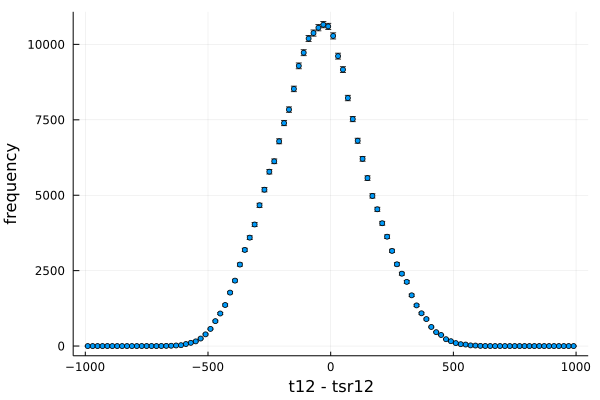

In [499]:
h,p       = JPetalo.hist1d(t12-tsr12, "t12 - tsr12", 100,  -1000., 1000.)
plot(p)

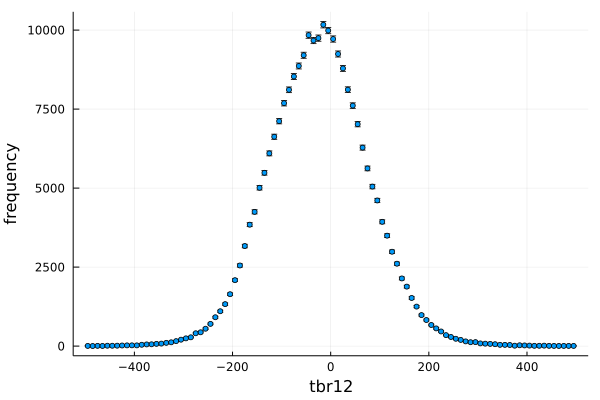

In [500]:
dtrb12 = JPetalo.cdoi(dfu, r1q, r2q,JPetalo.postrue);
trb12 = dtrb12 ./ps
h,p       = JPetalo.hist1d(trb12, "tbr12", 100,  -500., 500.)
plot(p)

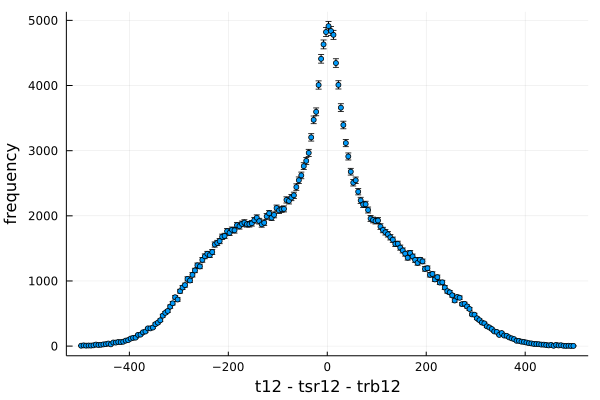

In [501]:
h,p       = JPetalo.hist1d(t12 - tsr12 - trb12  , "t12 - tsr12 - trb12", 200,  -500., 500.)
plot(p)

In [502]:
dt = t12 - tsr12 - trb12;

sigma1 = 184.244 sigma2 =  23.751

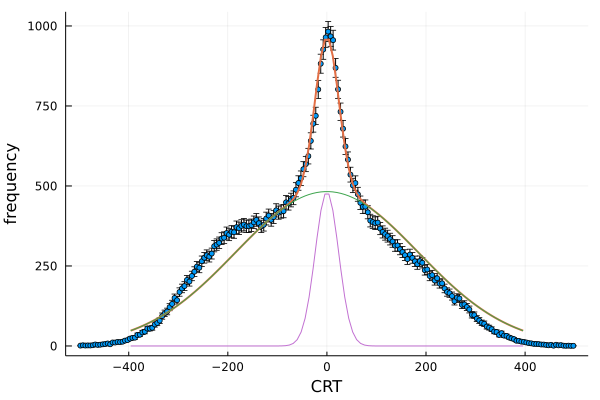

In [503]:
fg, p = JPetalo.fitg2(dt, "CRT", 200, -500.0, 500.0, 
                      xg1min=-400.0, xg1max=-50.0, 
                      xg2min=-50.0,  xg2max =50.0, 
                      xgmin =-400.0, xgmax  =400.0)
@printf "sigma1 = %7.3f sigma2 = %7.3f" fg.std[1] fg.std[2]
plot(p)

First photon, position true: FWHM1 = 423.761 FWHM2 =  54.628

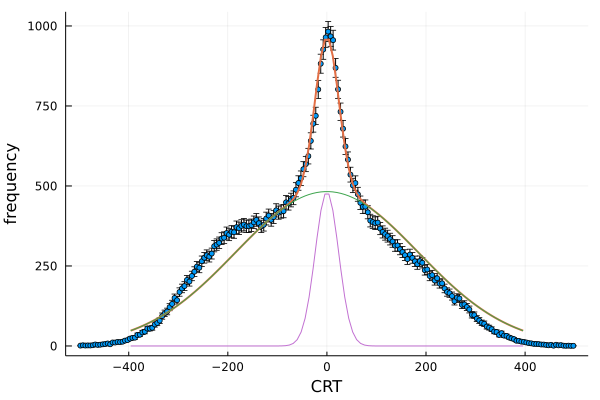

In [504]:
dt = JPetalo.crt(dfu, rx1p, rx2p, JPetalo.dtfirst,JPetalo.postrue)
fg, p = JPetalo.fitg2(dt, "CRT", 200, -500.0, 500.0, 
                      xg1min=-400.0, xg1max=-50.0, 
                      xg2min=-50.0,  xg2max =50.0, 
                      xgmin =-400.0, xgmax  =400.0)
@printf "First photon, position true: FWHM1 = %7.3f FWHM2 = %7.3f" 2.3*fg.std[1] 2.3*fg.std[2]
plot(p)

fastest photoelectron, position reco: FWHM = 419.943

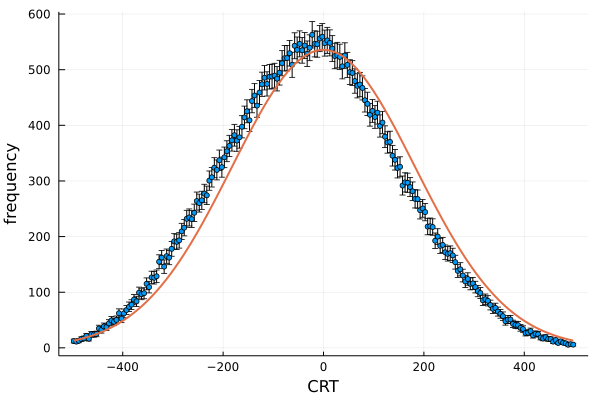

In [505]:
dt = JPetalo.crt(dfu, rx1p, rx2p, JPetalo.dtminimum, JPetalo.postrue)
fg,p = JPetalo.fitg1(dt, "CRT", 200, -500.0, 500.0,  
                     xgmin=-400.0, xgmax=400.0)
@printf "fastest photoelectron, position reco: FWHM = %7.3f" 2.3*fg.std[1] 
plot(p)

fastest photoelectron, position reco: FWHM = 414.890

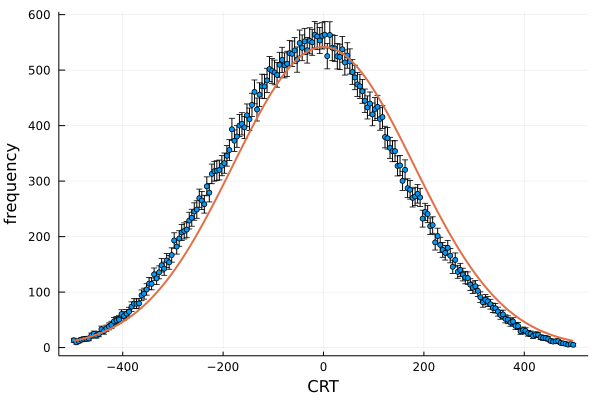

In [506]:
dt = JPetalo.crt(dfu, rx1p, rx2p, JPetalo.dtminimum,JPetalo.posreco)
fg,p = JPetalo.fitg1(dt, "CRT", 200, -500.0, 500.0,  
                     xgmin=-400.0, xgmax=400.0)
@printf "fastest photoelectron, position reco: FWHM = %7.3f" 2.3*fg.std[1] 
plot(p)

average photoelectron, position reco: FWHM = 369.701

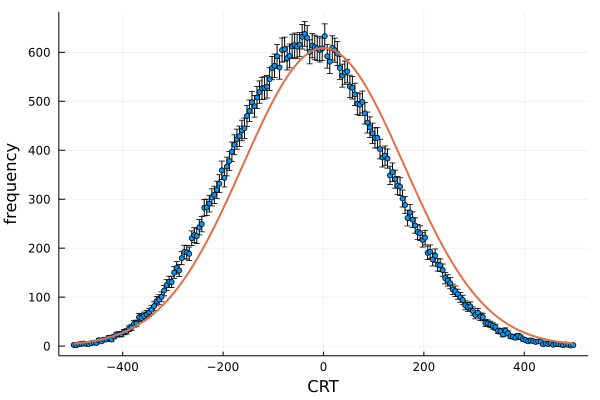

In [507]:
dt = JPetalo.crt(dfu, rx1p, rx2p, JPetalo.dtaverage,JPetalo.posreco)
fg,p = JPetalo.fitg1(dt, "CRT", 200, -500.0, 500.0,  
                     xgmin=-400.0, xgmax=400.0)
@printf "average photoelectron, position reco: FWHM = %7.3f" 2.3*fg.std[1] 
plot(p)

average photoelectron, position reco: FWHM = 383.398

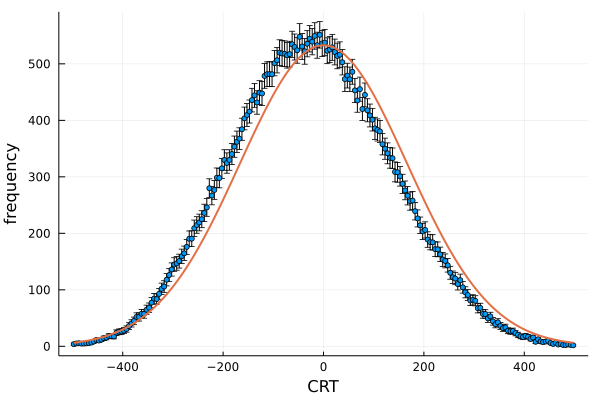

In [508]:
dt = JPetalo.crt(dfu, rx1p, rx2p, JPetalo.dtaverage,JPetalo.posrecall)
fg,p = JPetalo.fitg1(dt, "CRT", 200, -500.0, 500.0,  
                     xgmin=-400.0, xgmax=400.0)
@printf "average photoelectron, position reco: FWHM = %7.3f" 2.3*fg.std[1] 
plot(p)

## Add rx1p and rx2p

In [509]:
ndfq[!,"r1p"] = rx1p;
ndfq[!,"r2p"] = rx2p;

In [510]:
println(names(ndfq))

["nsipm1", "nsipm2", "phistd1", "phistd2", "q1", "q2", "r1", "r2", "t1", "t2", "ta1", "ta2", "tr1", "tr2", "ux", "uy", "uz", "x1", "x2", "xb1", "xb2", "xr1", "xr2", "xs", "xt1", "xt2", "y1", "y2", "yb1", "yb2", "yr1", "yr2", "ys", "yt1", "yt2", "z1", "z2", "zb1", "zb2", "zr1", "zr2", "zs", "zstd1", "zstd2", "zt1", "zt2", "r1p", "r2p"]


## Save

In [511]:
writemdf(datadir("n3df-all-mdf-p2"),"mdf-all-w.csv", ndfq)

"/Users/jj/JuliaProjects/JPetalo/data/n3df-all-mdf-p2/mdf-all-w.csv"

In [513]:
sqrt(40.0^2+30.0^2)

50.0